In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import matplotlib.ticker as plticker
import os.path
import scipy as sc
from scipy.optimize import curve_fit
from math import *

In [3]:
#setup plotter
%matplotlib qt
# matplotlib.verbose.level = 'debug-annoying'
sns.set_theme(style="darkgrid")
# sns.set(font_scale=1, rc={'figure.figsize' : (6.4, 4.8), 'text.usetex' : True, 'text.latex.preamble':r'\usepackage{siunitx}','savefig.bbox':'tight'})

(0.0, 1000.0)

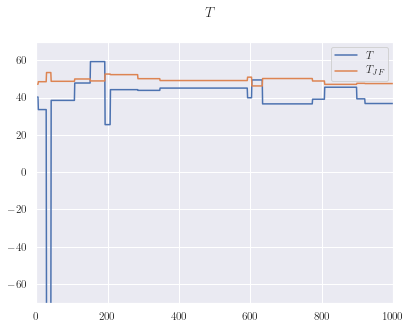

In [29]:
# plot rho
names=['s','T','TJF','V','E']
df = pd.read_csv("data/T.dat",sep='\s+',skiprows=1,names=names)

plt.figure()
plt.suptitle('$T$')
# plt.axvline(,color='red')
# plt.axvline(,color='green')
plt.plot(df['s'],df['T'],label='$T$')
plt.plot(df['s'],df['TJF'],label=r'$T_{JF}$')
# plt.plot(df['s'],df['V'],label=r'$V$')
# plt.plot(df['s'],df['TJF']+df['V'],label=r'$E$')
# plt.plot(df['s'],df['prob'],label=r'prob')
plt.legend()
plt.ylim([-70,70])
plt.xlim([0,0.001e6])

(-1.0, 3.0)

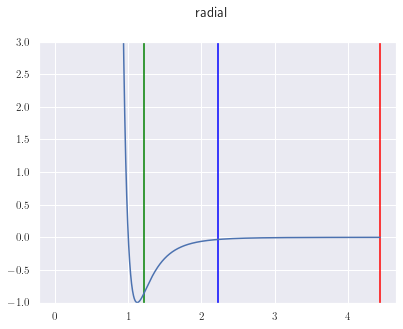

In [31]:
L=4.44228
b0=1.21571
V_LJ=lambda r: 4*(r**-12-r**-6)
r=np.linspace(0,L,1000)

plt.figure()
plt.suptitle('radial')
plt.axvline(L,color='red')
plt.axvline(L/2,color='blue')
plt.axvline(b0,color='green')
plt.plot(r,V_LJ(r))
# plt.yscale('log')
plt.ylim([-1,3])

(-5.0, 30.0)

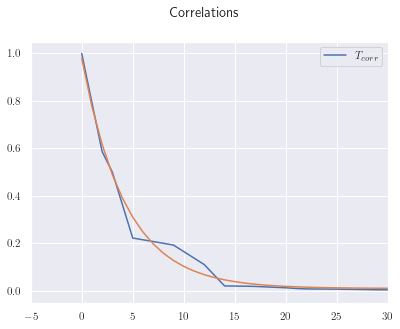

In [42]:
# plot
names=['s','Tcorr','Ts', 'TJFcorr', 'Vcorr', 'Ecorr']
df = pd.read_csv("data/correlation.dat",sep='\s+',skiprows=1,names=names)

l=[0.970176,0.234114,0.00917476]

plt.figure()
plt.suptitle('Correlations')
# plt.axvline(,color='red')
# plt.axvline(,color='green')
plt.plot(df['s'],df['Tcorr'],label='$T_{corr}$')
plt.plot(df['s'],l[0]*np.exp(-l[1]*df['s'])+l[2])
# plt.plot(df['s'],df['TJF'],label=r'$T_{JF}$')
# plt.plot(df['s'],df['V'],label=r'$V$')
# plt.plot(df['s'],df['TJF']+df['V'],label=r'$E$')
# plt.plot(df['s'],df['prob'],label=r'prob')
plt.legend()
# plt.ylim([-70,70])
plt.xlim([-5,30])

In [6]:
# import data
names=['b','E','stdE','EJF','stdEJF']
df = pd.read_csv("data/save/E2.dat",sep='\s+',skiprows=1,names=names)

# df['E'][3] = -0.20
# df['EJF'][3] = -0.15
# fit
y = lambda x,a,b,c: a * x**2 + b * x + c
par_E,var_par_E = curve_fit(y, xdata = df['b'], ydata = df['E'], p0 = [20,-50,30], sigma = df['stdE'])
par_EJF,var_par_EJF = curve_fit(y, xdata = df['b'], ydata = df['EJF'], p0 = [20,-50,30], sigma = df['stdEJF'])
# par_E,var_par_E = np.polyfit(df['b'],df['E'],2,cov=True)
# par_EJF,var_par_EJF = np.polyfit(df['b'],df['EJF'],2,cov=True)
b_fit = -par_E[1]/(2*par_E[0])
bJF_fit = -par_EJF[1]/(2*par_EJF[0])
b_fit_std = np.sqrt(var_par_E[1][1]/(2*par_E[0])**2 + (par_E[1]/(2*par_E[0]**2))**2 * var_par_E[0][0])
bJF_fit_std = np.sqrt(var_par_EJF[1][1]/(2*par_EJF[0])**2 + (par_EJF[1]/(2*par_EJF[0]**2))**2 * var_par_EJF[0][0])
print("b:",b_fit," +/- ",b_fit_std," b_JF: ", bJF_fit,"+/-",bJF_fit_std)

# plot
plt.figure()
plt.suptitle('E')
# plt.axvline(,color='red')
# plt.axvline(,color='green')
plt.errorbar(x=df['b'],y=df['E'],yerr=df['stdE'],label='$E$')
plt.errorbar(x=df['b'],y=df['EJF'],yerr=df['stdEJF'],label='$E_{JF}$')
# plt.plot(df['b'],par_E[0]*df['b']**2 + par_E[1] * df['b'] + par_E[2],label=r'$E_{fit}$')
# plt.plot(df['b'],par_EJF[0]*df['b']**2 + par_EJF[1] * df['b'] + par_EJF[2],label=r'$EJF_{fit}$')

plt.axvline(b_fit,color='red')
plt.axvline(bJF_fit,color='green')
plt.legend()
plt.ylim([-0.5,0.3])
plt.xlabel('$b$')
plt.ylabel('$E/N$')
# plt.xlim([-5,30])

b: 1.189201662810349  +/-  0.1140528724218542  b_JF:  1.1882815207637896 +/- 0.12554471570350384


Text(0, 0.5, '$E/N$')

In [46]:
par_EJF

array([ 21.38089105, -50.79128271,  29.8333859 ])

In [57]:
# Question 5
M=20
names=['rho','b','E','stdE','EJF','stdEJF']
df = pd.read_csv("data/E_rhovar.dat",sep='\s+',skiprows=1,names=names)

y = lambda x,a,b,c: a * x**2 + b * x + c

E_fit = np.zeros((len(df['rho'])//M,))
dE = np.zeros((len(df['rho'])//M,))
EJF_fit = np.zeros((len(df['rho'])//M,))
dEJF = np.zeros((len(df['rho'])//M,))
rho = np.zeros((len(df['rho'])//M,))

plt.figure()
plt.suptitle('E')
# plt.axvline(,color='red')
# plt.axvline(,color='green')
for i in range(len(df['rho'])//M):
    plt.errorbar(x=df['b'][i*M:(i+1)*M],y=df['E'][i*M:(i+1)*M],yerr=df['stdE'][i*M:(i+1)*M],label='E, rho:{}'.format(df['rho'][i*M]))
    plt.errorbar(x=df['b'][i*M:(i+1)*M],y=df['EJF'][i*M:(i+1)*M],yerr=df['stdEJF'][i*M:(i+1)*M],label='E_JF, rho:{}'.format(df['rho'][i*M]))
    rho[i] = df['rho'][i*M]
    par_E,var_par_E = curve_fit(y, xdata = df['b'][i*M:(i+1)*M], ydata = df['E'][i*M:(i+1)*M], p0 = [20,-50,30], sigma = df['stdE'][i*M:(i+1)*M])
    par_EJF,var_par_EJF = curve_fit(y, xdata = df['b'][i*M:(i+1)*M], ydata = df['EJF'][i*M:(i+1)*M], p0 = [20,-50,30], sigma = df['stdEJF'][i*M:(i+1)*M])

    E_fit[i] = par_E[2] - par_E[1]**2/(4*par_E[0])
    dE[i] = np.sqrt(var_par_E[2][2] + (2*par_E[1]/(4*par_E[0]))**2 * var_par_E[1][1] + (par_E[1]**2/(4*par_E[0]**2))*var_par_E[0][0] )
    EJF_fit[i] = par_EJF[2] - par_EJF[1]**2/(4*par_EJF[0])
    dEJF[i] = np.sqrt(var_par_EJF[2][2] + (2*par_EJF[1]/(4*par_EJF[0]))**2 * var_par_EJF[1][1] + (par_EJF[1]**2/(4*par_EJF[0]**2))*var_par_EJF[0][0] )
plt.xlabel('$b$')
plt.ylabel('$E/N$')
plt.legend()


In [58]:
par_E,var_par_E = curve_fit(y, xdata = rho, ydata = E_fit, p0 = [20,-50,30], sigma = dE)
par_EJF,var_par_EJF = curve_fit(y, xdata = rho, ydata = EJF_fit, p0 = [20,-50,30], sigma = dEJF)

rho_fit = -par_E[1]/(2*par_E[0])
rhoJF_fit = -par_EJF[1]/(2*par_EJF[0])

print(rho_fit/0.36,rhoJF_fit/0.36)

plt.figure()
plt.errorbar(x=rho,y=E_fit,yerr=dE,label='E')
plt.errorbar(x=rho,y=EJF_fit,yerr=dEJF,label='EJF')

rho = np.linspace(0.28-2*0.1,0.38,100)
plt.plot(rho,par_E[0]*rho**2 + par_E[1] * rho + par_E[2],label=r'$E_{fit}$')
plt.plot(rho,par_EJF[0]*rho**2 + par_EJF[1] * rho + par_EJF[2],label=r'$EJF_{fit}$')
# plt.ylim([-0.6,0.4])
plt.xlabel('$rho$')
plt.ylabel('$E/N$')
plt.legend()

0.28463307745286676 0.2698316105603792
